<a href="https://colab.research.google.com/github/Deeksha-Pandit/EVA4-S7/blob/master/MainCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
folder = '/content/gdrive/My Drive/Session7'
sys.path.append(folder)

In [0]:
%matplotlib inline
import torch
import train_test_data
import show_images
import my_model
import train_test
import evaluate

In [4]:
classes, trainloader, testloader = train_test_data.load()


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


plane   dog  deer  deer


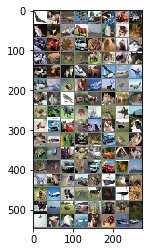

In [5]:
show_images.show_random_images(trainloader, classes)

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = my_model.Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          18,432
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
        MaxPool2d-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [11]:
EPOCHS = 50
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train_test.train(model, device, trainloader, optimizer, criterion, epoch)
    train_test.test(model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.7876030206680298 Batch_id=390 Accuracy=19.76: 100%|██████████| 391/391 [00:18<00:00, 21.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0164, Accuracy: 1960/10000 (19.60%)

EPOCH: 2


Loss=1.4930717945098877 Batch_id=390 Accuracy=33.93: 100%|██████████| 391/391 [00:17<00:00, 21.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0137, Accuracy: 3685/10000 (36.85%)

EPOCH: 3


Loss=1.3361393213272095 Batch_id=390 Accuracy=46.26: 100%|██████████| 391/391 [00:18<00:00, 26.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0134, Accuracy: 3944/10000 (39.44%)

EPOCH: 4


Loss=1.144030213356018 Batch_id=390 Accuracy=53.41: 100%|██████████| 391/391 [00:18<00:00, 21.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0123, Accuracy: 4526/10000 (45.26%)

EPOCH: 5


Loss=1.1412947177886963 Batch_id=390 Accuracy=57.98: 100%|██████████| 391/391 [00:18<00:00, 21.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 5057/10000 (50.57%)

EPOCH: 6


Loss=1.1010768413543701 Batch_id=390 Accuracy=61.27: 100%|██████████| 391/391 [00:17<00:00, 27.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 5342/10000 (53.42%)

EPOCH: 7


Loss=1.035519003868103 Batch_id=390 Accuracy=63.92: 100%|██████████| 391/391 [00:18<00:00, 21.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 6104/10000 (61.04%)

EPOCH: 8


Loss=1.0768582820892334 Batch_id=390 Accuracy=65.77: 100%|██████████| 391/391 [00:18<00:00, 21.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 6058/10000 (60.58%)

EPOCH: 9


Loss=0.8456247448921204 Batch_id=390 Accuracy=67.63: 100%|██████████| 391/391 [00:18<00:00, 28.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 6298/10000 (62.98%)

EPOCH: 10


Loss=0.8527673482894897 Batch_id=390 Accuracy=69.05: 100%|██████████| 391/391 [00:18<00:00, 21.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 6508/10000 (65.08%)

EPOCH: 11


Loss=0.8199617266654968 Batch_id=390 Accuracy=70.56: 100%|██████████| 391/391 [00:18<00:00, 21.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 6617/10000 (66.17%)

EPOCH: 12


Loss=0.9486461877822876 Batch_id=390 Accuracy=71.84: 100%|██████████| 391/391 [00:18<00:00, 21.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 6651/10000 (66.51%)

EPOCH: 13


Loss=0.6690247058868408 Batch_id=390 Accuracy=72.57: 100%|██████████| 391/391 [00:18<00:00, 21.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 6723/10000 (67.23%)

EPOCH: 14


Loss=0.6378223299980164 Batch_id=390 Accuracy=73.56: 100%|██████████| 391/391 [00:18<00:00, 21.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 6806/10000 (68.06%)

EPOCH: 15


Loss=0.8510241508483887 Batch_id=390 Accuracy=74.33: 100%|██████████| 391/391 [00:18<00:00, 21.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7092/10000 (70.92%)

EPOCH: 16


Loss=0.6637546420097351 Batch_id=390 Accuracy=75.18: 100%|██████████| 391/391 [00:18<00:00, 26.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 7051/10000 (70.51%)

EPOCH: 17


Loss=0.45366644859313965 Batch_id=390 Accuracy=76.04: 100%|██████████| 391/391 [00:18<00:00, 21.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7239/10000 (72.39%)

EPOCH: 18


Loss=0.7229523658752441 Batch_id=390 Accuracy=76.38: 100%|██████████| 391/391 [00:18<00:00, 28.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7172/10000 (71.72%)

EPOCH: 19


Loss=0.5640591979026794 Batch_id=390 Accuracy=77.07: 100%|██████████| 391/391 [00:18<00:00, 25.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7356/10000 (73.56%)

EPOCH: 20


Loss=0.6366357803344727 Batch_id=390 Accuracy=77.51: 100%|██████████| 391/391 [00:18<00:00, 21.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7548/10000 (75.48%)

EPOCH: 21


Loss=0.4525795578956604 Batch_id=390 Accuracy=78.15: 100%|██████████| 391/391 [00:18<00:00, 27.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7534/10000 (75.34%)

EPOCH: 22


Loss=0.5513288974761963 Batch_id=390 Accuracy=78.49: 100%|██████████| 391/391 [00:18<00:00, 21.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7591/10000 (75.91%)

EPOCH: 23


Loss=0.6251748204231262 Batch_id=390 Accuracy=78.95: 100%|██████████| 391/391 [00:17<00:00, 27.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7611/10000 (76.11%)

EPOCH: 24


Loss=0.7131729125976562 Batch_id=390 Accuracy=79.29: 100%|██████████| 391/391 [00:18<00:00, 21.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7694/10000 (76.94%)

EPOCH: 25


Loss=0.5483079552650452 Batch_id=390 Accuracy=79.82: 100%|██████████| 391/391 [00:18<00:00, 21.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7717/10000 (77.17%)

EPOCH: 26


Loss=0.6050881147384644 Batch_id=390 Accuracy=80.09: 100%|██████████| 391/391 [00:17<00:00, 25.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7844/10000 (78.44%)

EPOCH: 27


Loss=0.7437952756881714 Batch_id=390 Accuracy=80.36: 100%|██████████| 391/391 [00:18<00:00, 20.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7698/10000 (76.98%)

EPOCH: 28


Loss=0.5842325687408447 Batch_id=390 Accuracy=80.88: 100%|██████████| 391/391 [00:18<00:00, 27.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7712/10000 (77.12%)

EPOCH: 29


Loss=0.6915241479873657 Batch_id=390 Accuracy=81.20: 100%|██████████| 391/391 [00:18<00:00, 21.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7891/10000 (78.91%)

EPOCH: 30


Loss=0.7404670119285583 Batch_id=390 Accuracy=81.49: 100%|██████████| 391/391 [00:18<00:00, 20.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7799/10000 (77.99%)

EPOCH: 31


Loss=0.5592340230941772 Batch_id=390 Accuracy=81.75: 100%|██████████| 391/391 [00:18<00:00, 21.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7771/10000 (77.71%)

EPOCH: 32


Loss=0.6925407648086548 Batch_id=390 Accuracy=82.03: 100%|██████████| 391/391 [00:18<00:00, 20.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7712/10000 (77.12%)

EPOCH: 33


Loss=0.46346625685691833 Batch_id=390 Accuracy=82.19: 100%|██████████| 391/391 [00:18<00:00, 20.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7857/10000 (78.57%)

EPOCH: 34


Loss=0.4543699622154236 Batch_id=390 Accuracy=82.78: 100%|██████████| 391/391 [00:18<00:00, 20.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7739/10000 (77.39%)

EPOCH: 35


Loss=0.4689895510673523 Batch_id=390 Accuracy=82.78: 100%|██████████| 391/391 [00:18<00:00, 26.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7923/10000 (79.23%)

EPOCH: 36


Loss=0.46110257506370544 Batch_id=390 Accuracy=82.93: 100%|██████████| 391/391 [00:18<00:00, 20.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7943/10000 (79.43%)

EPOCH: 37


Loss=0.48469990491867065 Batch_id=390 Accuracy=83.37: 100%|██████████| 391/391 [00:18<00:00, 20.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7970/10000 (79.70%)

EPOCH: 38


Loss=0.5556871294975281 Batch_id=390 Accuracy=83.53: 100%|██████████| 391/391 [00:18<00:00, 20.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7968/10000 (79.68%)

EPOCH: 39


Loss=0.5058432817459106 Batch_id=390 Accuracy=83.83: 100%|██████████| 391/391 [00:18<00:00, 20.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7863/10000 (78.63%)

EPOCH: 40


Loss=0.6572561264038086 Batch_id=390 Accuracy=84.08: 100%|██████████| 391/391 [00:18<00:00, 20.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7981/10000 (79.81%)

EPOCH: 41


Loss=0.4945797920227051 Batch_id=390 Accuracy=84.28: 100%|██████████| 391/391 [00:18<00:00, 20.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7922/10000 (79.22%)

EPOCH: 42


Loss=0.5032511949539185 Batch_id=390 Accuracy=84.13: 100%|██████████| 391/391 [00:18<00:00, 21.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7930/10000 (79.30%)

EPOCH: 43


Loss=0.5085924863815308 Batch_id=390 Accuracy=84.81: 100%|██████████| 391/391 [00:18<00:00, 21.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7865/10000 (78.65%)

EPOCH: 44


Loss=0.4301532208919525 Batch_id=390 Accuracy=84.66: 100%|██████████| 391/391 [00:18<00:00, 21.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8064/10000 (80.64%)

EPOCH: 45


Loss=0.5024193525314331 Batch_id=390 Accuracy=85.35: 100%|██████████| 391/391 [00:18<00:00, 27.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7949/10000 (79.49%)

EPOCH: 46


Loss=0.4219733774662018 Batch_id=390 Accuracy=85.17: 100%|██████████| 391/391 [00:18<00:00, 21.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7926/10000 (79.26%)

EPOCH: 47


Loss=0.48584944009780884 Batch_id=390 Accuracy=85.59: 100%|██████████| 391/391 [00:18<00:00, 21.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7944/10000 (79.44%)

EPOCH: 48


Loss=0.5128229856491089 Batch_id=390 Accuracy=85.66: 100%|██████████| 391/391 [00:18<00:00, 21.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7914/10000 (79.14%)

EPOCH: 49


Loss=0.44405531883239746 Batch_id=390 Accuracy=85.68: 100%|██████████| 391/391 [00:18<00:00, 28.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7909/10000 (79.09%)

EPOCH: 50


Loss=0.46294498443603516 Batch_id=390 Accuracy=86.14: 100%|██████████| 391/391 [00:18<00:00, 21.32it/s]



Test set: Average loss: 0.0052, Accuracy: 7974/10000 (79.74%)



GroundTruth:   frog  bird  bird truck
Predicted:   frog  frog  bird truck


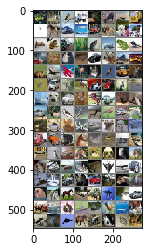

In [12]:
evaluate.show_predicted_actual(model, device, testloader, classes)

In [13]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 79.740 %


In [14]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 69 %
Accuracy of   car : 91 %
Accuracy of  bird : 80 %
Accuracy of   cat : 78 %
Accuracy of  deer : 90 %
Accuracy of   dog : 62 %
Accuracy of  frog : 93 %
Accuracy of horse : 63 %
Accuracy of  ship : 94 %
Accuracy of truck : 88 %
